### Simple implementation of Neural Network and BackPropagation

In [408]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
class NeuralNet(object):

    def __init__(self, layers: list):
        self.dims = layers
        self.w = [np.random.normal(0, 0.1, (layers[i+1], layers[i])) for i in range(len(layers)-1)]
        self.b = [np.random.normal(0, 0.1, (layers[i+1], 1)) for i in range(len(layers)-1)]
        self.loss = 0


    def ReLU(self, x: np.array):
        return x * (x > 0)

    def sig(self, x: np.array):
        return 1 / (1 + np.exp(-x))

    
    def quadratic_loss(self, y: np.array, y_hat: np.array):
        return np.sum((y_hat - y)**2)

    def quadratic_loss_prime(self, y: np.array, y_hat: np.array):
        return 2 * (y_hat - y)

    def cross_entropy_loss(self, y: np.array, y_hat: np.array):
        return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def cross_entropy_loss_prime(self, y: np.array, y_hat: np.array):
        return -y / y_hat + (1 - y) / (1 - y_hat)

    
    def softmax(self, x: np.array, t: float = 1.0):
        return np.exp(x * t) / np.sum(np.exp(x * t))


    def forward(self, x: np.array):

        x_ = x.reshape(-1, 1)
        y_ = x_
        for bias, weight in zip(self.b, self.w):
            x_ = np.dot(weight, y_) + bias
            y_ = self.ReLU(x_)
            
        return x_

    
    def bp(self, x: np.array, y: np.array, lr: float = 1e-3):

        grad_b = [np.zeros(b.shape) for b in self.b]
        grad_w = [np.zeros(w.shape) for w in self.w]

        h = x.reshape(-1, 1)
        activations = [h]

        fs = []
        for bias, weight in zip(self.b, self.w):

            f = np.dot(weight, h) + bias
            fs.append(f)

            h = self.ReLU(f)
            activations.append(h)

        self.loss += self.quadratic_loss(y, activations[-1])

        delta = self.quadratic_loss_prime(y, fs[-1]) 
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)

        for i in range(2, len(self.dims)):
            delta = (fs[-i] > 0) * np.dot(self.w[-i+1].T, delta)
            grad_b[-i] = delta
            grad_w[-i] = np.dot(delta, activations[-i-1].T)

        for i in range(len(self.w)):
            self.w[i] -= lr * grad_w[i]
            self.b[i] -= lr * grad_b[i]


    
    def train(self, x: np.array, y: np.array, lr: float, epochs: int):
        loss = []
        for q in range(epochs):

            self.loss = 0

            for i in range(x.shape[0]):
                self.bp(x[i,:], np.array(y[i]), lr)
                
            print(f"Epoch {q+1} Loss: {self.loss}")
            loss.append(self.loss)

        return loss


Epoch 1 Loss: 719.060695210407
Epoch 2 Loss: 408.69544690354945
Epoch 3 Loss: 407.2859744913494
Epoch 4 Loss: 407.2345846009222
Epoch 5 Loss: 407.200416001395
Epoch 6 Loss: 407.1686688567518
Epoch 7 Loss: 407.1384784996199
Epoch 8 Loss: 407.1093087574469
Epoch 9 Loss: 407.0807849345735
Epoch 10 Loss: 407.05251417666744
Epoch 11 Loss: 407.0242610377064
Epoch 12 Loss: 406.99558835627147
Epoch 13 Loss: 406.9661192004908
Epoch 14 Loss: 406.93559171753543
Epoch 15 Loss: 406.90358757806894
Epoch 16 Loss: 406.86950799363547
Epoch 17 Loss: 406.8333888199055
Epoch 18 Loss: 406.7993893964836
Epoch 19 Loss: 406.7640829232008
Epoch 20 Loss: 406.72637373143755
Epoch 21 Loss: 406.6855124327725
Epoch 22 Loss: 406.6408082003405
Epoch 23 Loss: 406.5932709941426
Epoch 24 Loss: 406.54552131526697
Epoch 25 Loss: 406.49423324877847
Epoch 26 Loss: 406.43908264504876
Epoch 27 Loss: 406.37175420025113
Epoch 28 Loss: 406.3016936598076
Epoch 29 Loss: 406.2275080993927
Epoch 30 Loss: 406.1463429821269
Epoch 31 L

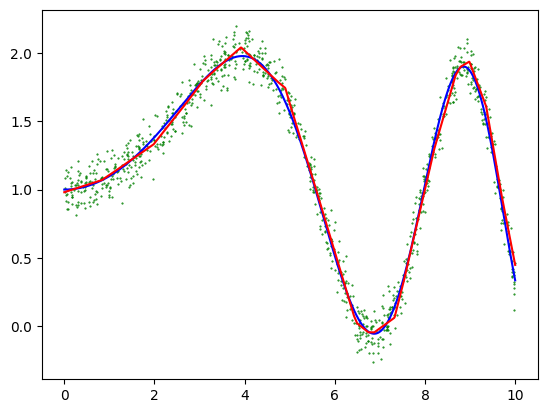

In [412]:
def generate_data(n: int):
    x = np.random.uniform(0, 10, size=(n,1))
    y = np.sin(x**2 / 10) + np.cos(x / 20) + np.random.randn(n, 1) * 0.1

    return np.array(x), np.array(y)

x, y = generate_data(1000)

nn = NeuralNet([1, 10, 10, 10, 10, 1])
loss = nn.train(x, y, 1e-3, 1000)

# plt.plot(np.log(loss))

n = 1000
x_test = np.linspace(0, 10, n)
y_test = np.sin(x_test**2 / 10) + np.cos(x_test / 20)
y_hat = [nn.forward(np.array([val])).item() for val in x_test]
plt.plot(x, y, 'go', markersize=0.5)
plt.plot(x_test, y_test, 'b')
plt.plot(x_test, y_hat, 'r')

[0. 0. 0. 0. 0. 0.] [1.]
[0. 0. 0. 0. 0. 1.] [0.]
[0. 0. 0. 0. 1. 0.] [0.]
[0. 0. 0. 0. 1. 1.] [0.]
[0. 0. 0. 1. 0. 0.] [0.]
[0. 0. 0. 1. 0. 1.] [0.]
[0. 0. 0. 1. 1. 0.] [0.]
[0. 0. 0. 1. 1. 1.] [0.]
[0. 0. 1. 0. 0. 0.] [0.]
[0. 0. 1. 0. 0. 1.] [0.]
[0. 0. 1. 0. 1. 0.] [0.]
[0. 0. 1. 0. 1. 1.] [0.]
[0. 0. 1. 1. 0. 0.] [1.]
[0. 0. 1. 1. 0. 1.] [0.]
[0. 0. 1. 1. 1. 0.] [0.]
[0. 0. 1. 1. 1. 1.] [0.]
[0. 1. 0. 0. 0. 0.] [0.]
[0. 1. 0. 0. 0. 1.] [0.]
[0. 1. 0. 0. 1. 0.] [1.]
[0. 1. 0. 0. 1. 1.] [0.]
[0. 1. 0. 1. 0. 0.] [0.]
[0. 1. 0. 1. 0. 1.] [0.]
[0. 1. 0. 1. 1. 0.] [0.]
[0. 1. 0. 1. 1. 1.] [0.]
[0. 1. 1. 0. 0. 0.] [0.]
[0. 1. 1. 0. 0. 1.] [0.]
[0. 1. 1. 0. 1. 0.] [0.]
[0. 1. 1. 0. 1. 1.] [0.]
[0. 1. 1. 1. 0. 0.] [0.]
[0. 1. 1. 1. 0. 1.] [0.]
[0. 1. 1. 1. 1. 0.] [1.]
[0. 1. 1. 1. 1. 1.] [0.]
[1. 0. 0. 0. 0. 0.] [0.]
[1. 0. 0. 0. 0. 1.] [1.]
[1. 0. 0. 0. 1. 0.] [0.]
[1. 0. 0. 0. 1. 1.] [0.]
[1. 0. 0. 1. 0. 0.] [0.]
[1. 0. 0. 1. 0. 1.] [0.]
[1. 0. 0. 1. 1. 0.] [0.]
[1. 0. 0. 1. 1. 1.] [0.]


ValueError: shapes (2,6) and (384,1) not aligned: 6 (dim 1) != 384 (dim 0)

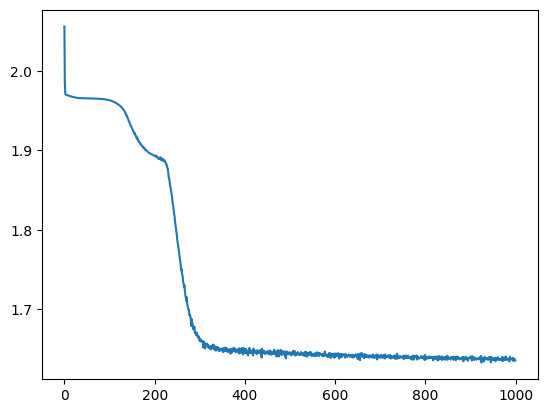

In [424]:
def generate_data():

    X = []
    Y = []
    for i in range(2**6):
        num = [int(bit) for bit in format(i, '06b')]
        x = np.array(num, dtype=np.float32)
        y = np.array([num == num[::-1]], dtype=np.float32)

        X.append(x)
        Y.append(y)

    return X, Y

x, y = generate_data()
x = np.array(x)
y = np.array(y)
for i in range(len(x)):
    print(x[i], y[i])

nn = NeuralNet([6, 2, 1])
loss = nn.train(x, y, 1e-2, 1000)
plt.plot(np.log(loss))

correct = 0
total = 0

for i in range(len(x)):
    output = nn.forward(x[i:]).item()
    if output.item() >= threshold:
        prediction = 1
    else:
        prediction = 0

    if prediction == sample_y.item():
        correct += 1

    total += 1

    print(f"Accuracy: {correct / total}")
